### 构建网络
* 构建线性拟合模型
* 线性模型 $y=wx+b$

[ -9 -10   5  -9   4  -6 -10   5  -7  -8  -8   4   1  -2  -1   9  -5   8
   5   9 -10  -7   7 -10  -7  -3   0  -6  -2  -7]
[-13, -15, 13, -13, 13, -8, -15, 15, -11, -12, -12, 13, 5, 0, 2, 21, -5, 21, 13, 23, -16, -11, 19, -16, -10, -1, 4, -9, -1, -9]


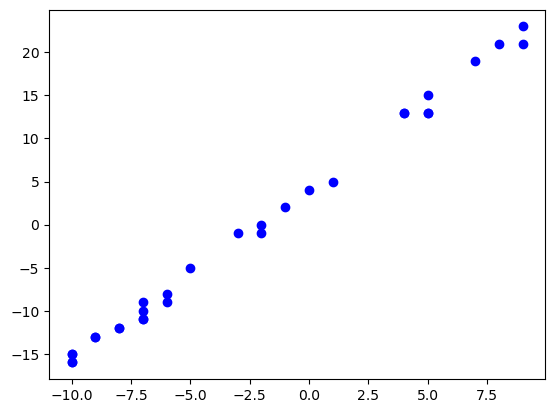

In [3]:
# 模拟数据
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)

y_train = [w * x + b + random.randint(0,2) for x in x_train]
print(x_train)
print(y_train)

plt.plot(x_train, y_train, 'bo')

### 生成模型对象


In [5]:

import torch
from torch import nn
# 线性模型的定义，继承自父类nn.Module
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    # w参数,随机参数
    self.weight = nn.Parameter(torch.randn(1))
    # b参数，随机参数
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):
    return (input * self.weight) + self.bias

In [7]:
model = LinearModel()
x = torch.tensor(3)
print(x)
y = model(x)
print(y)

tensor(3)
tensor([-6.8408], grad_fn=<AddBackward0>)


In [8]:
# 进行训练
model = LinearModel()
# 定义优化器,使用随机梯度下降算法
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)
# 生成目标张量
y_train = torch.tensor(y_train, dtype=torch.float32)

for _ in range(1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    # 计算均方误差
    loss = nn.MSELoss()(output, y_train)
    # 将模型中所有参数的梯度清零
    model.zero_grad()
    # 反向传播
    loss.backward()
    # 根据计算出的梯度更新模型的参数
    optimizer.step()

In [9]:
# 查看参数信息
for parameter in model.named_parameters():
  print(parameter)
# 输出：

('weight', Parameter containing:
tensor([1.9567], requires_grad=True))
('bias', Parameter containing:
tensor([3.3625], requires_grad=True))


In [26]:
params = model.named_parameters()
# print(next(params)[1])
w = next(params)[1][0].item()
print(w)
b = next(params)[1][0].item()
print(b)

1.956662654876709
3.362513780593872


In [20]:
# 创建一个二维张量
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# 获取第一行的第一个元素
first_element = tensor[0, 0]
print(first_element)

tensor(1)


1.956662654876709
3.362513780593872


C:\Users\Steven\AppData\Local\Temp\ipykernel_17540\4233362385.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_train, y_train, 'bo',color='red', label='Training Data')


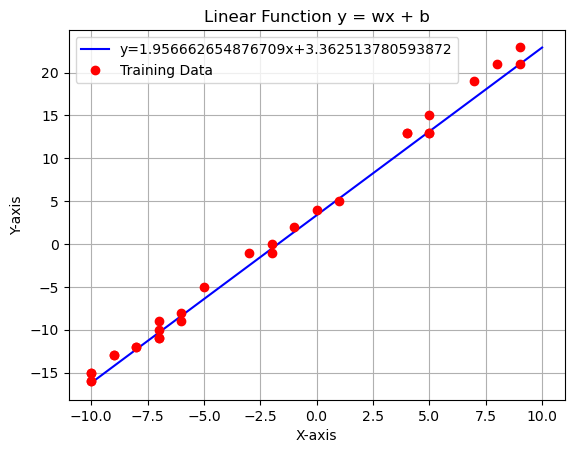

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 定义直线的参数
w = 2  # 斜率
b = 1  # 截距

# 生成 x 值的范围
x = np.linspace(-10, 10, 400)  # 从 -10 到 10 生成 400 个点

# 计算对应的 y 值
params = model.named_parameters()
# print(next(params)[1])
w = next(params)[1][0].item()
print(w)
b = next(params)[1][0].item()
print(b)
y = w * x + b

# 创建图形和轴
plt.figure()

# 绘制直线
plt.plot(x, y, 'b-', label=f'y={w}x+{b}')  # 'b-' 表示蓝色实线，label用于图例

plt.plot(x_train, y_train, 'bo',color='red', label='Training Data')

# 添加标题和标签
plt.title('Linear Function y = wx + b')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 设置网格线
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()

#### 保存训练好的模型
1. 通过`model.state_dict()` 来保存，加载模型是需要创建模型
2. 通过`torch.save(model)` 保存模型，不需要加载网络结构了

In [32]:
model.state_dict()

OrderedDict([('weight', tensor([1.9567])), ('bias', tensor([3.3625]))])

In [31]:
torch.save(model.state_dict(), './linear_model.pth')

In [34]:
#加载模型
# 先定义网络结构
linear_model = LinearModel()
# 加载保存的参数
linear_model.load_state_dict(torch.load('./linear_model.pth'))
linear_model.eval()
for parameter in linear_model.named_parameters():
  print(parameter)



('weight', Parameter containing:
tensor([1.9567], requires_grad=True))
('bias', Parameter containing:
tensor([3.3625], requires_grad=True))


C:\Users\Steven\AppData\Local\Temp\ipykernel_17540\4078875238.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  linear_model.load_state_dict(torch.load('./linear_model.pth

In [35]:
# 保存整个模型
torch.save(model, './linear_model_with_arc.pth')
# 加载模型，不需要创建网络了
linear_model_2 = torch.load('./linear_model_with_arc.pth')
linear_model_2.eval()
for parameter in linear_model_2.named_parameters():
  print(parameter)


('weight', Parameter containing:
tensor([1.9567], requires_grad=True))
('bias', Parameter containing:
tensor([3.3625], requires_grad=True))


C:\Users\Steven\AppData\Local\Temp\ipykernel_17540\728832465.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  linear_model_2 = torch.load('./linear_model_with_arc.pth')
